In [1]:
ls

penguins_cytb.fasta  penguins_mass.csv  sequence_translate.py  Untitled.ipynb


In [2]:
import pandas as pd

In [3]:
penguins_df = pd.read_csv("penguins_mass.csv") # Load the penguin mass data into a DataFrame
penguins_df.head() # Display the first few rows of the dataframe

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25


In [4]:
from Bio import SeqIO

# Function to read sequences from a FASTA file
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):  # Parse the FASTA file
        description = record.description.split()  # Extract species name from description
        species_name = description[1] + " " + description[2]  # Assuming the format is "Genus species"
        sequence_data_dict[species_name] = record.seq  # Store the sequence
    return sequence_data_dict

# Load the cytochrome-b sequences
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [5]:
from Bio.Seq import Seq

def alternative_translate_function(string_nucleotides):
    sequence = Seq(string_nucleotides)
    aa_seq_string = sequence.translate(to_stop=True)  # Translate sequence to amino acids, stopping at the stop codon
    return str(aa_seq_string)

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(aa_seq)
    molecular_weight = analyzed_seq.molecular_weight()
    return molecular_weight

In [7]:
def compute_gc_content(dna_seq):
    gc_content = (dna_seq.count("G") + dna_seq.count("C")) / len(dna_seq) * 100
    return gc_content

In [8]:
# Add empty columns for molecular weight and GC content
penguins_df['molecular_weight'] = None
penguins_df['GC_content'] = None

# Loop through each species and calculate molecular weight and GC content
for species in cytb_seqs:
    dna_seq = cytb_seqs[species]
    aa_seq = alternative_translate_function(dna_seq)  # Translate to amino acids
    molecular_weight = compute_molecular_weight(aa_seq)  # Compute molecular weight
    gc_content = compute_gc_content(dna_seq)  # Compute GC content

    # Add the results to the DataFrame
    penguins_df.loc[penguins_df['species'] == species, 'molecular_weight'] = molecular_weight
    penguins_df.loc[penguins_df['species'] == species, 'GC_content'] = gc_content

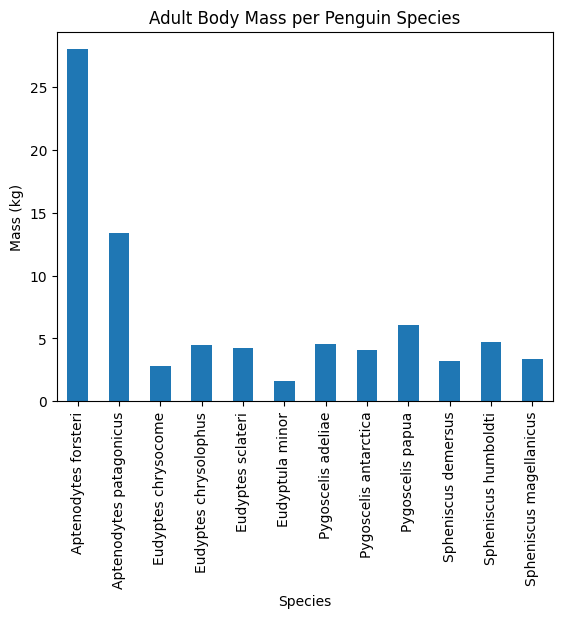

In [9]:
import matplotlib.pyplot as plt

# Plot the bar chart for body mass per species
penguins_df.plot(kind="bar", x="species", y="mass", legend=False)
plt.title('Adult Body Mass per Penguin Species')
plt.xlabel('Species')
plt.ylabel('Mass (kg)')
plt.xticks(rotation=90)  # Rotate species names for better readability
plt.show()

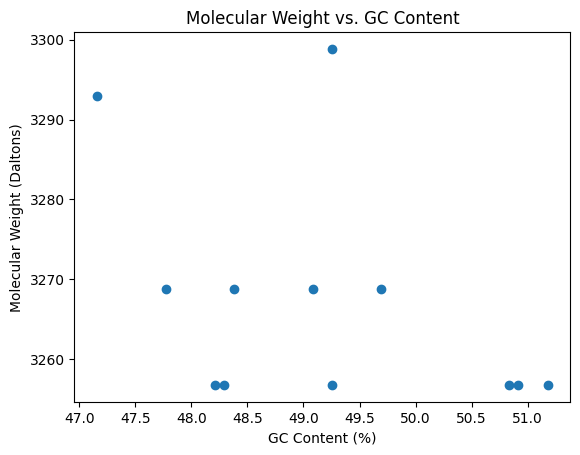

In [10]:
# Scatter plot for molecular weight vs. GC content
plt.scatter(penguins_df['GC_content'], penguins_df['molecular_weight'])
plt.title('Molecular Weight vs. GC Content')
plt.xlabel('GC Content (%)')
plt.ylabel('Molecular Weight (Daltons)')
plt.show()

In [11]:
ls

penguins_cytb.fasta  Python_Homework.ipynb
penguins_mass.csv    sequence_translate.py


In [12]:
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

In [13]:
ls

penguins_cytb.fasta  penguins_mass_cytb.csv  sequence_translate.py
penguins_mass.csv    Python_Homework.ipynb


In [19]:
%%bash
git remote add origin git@github.com:kofetch/BCB546-PythonHW_Spring2025.git

error: remote origin already exists.


CalledProcessError: Command 'b'git remote add origin git@github.com:kofetch/BCB546-PythonHW_Spring2025.git\n'' returned non-zero exit status 3.

In [ ]:
git add Python_Homework.ipynb